In [123]:
import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
from cartopy.mpl.ticker import LatitudeFormatter
from matplotlib.ticker import MultipleLocator
from scipy.ndimage import gaussian_filter

In [124]:
def read_hdf5(file_path, dataset_names):
    datasets = []
    with h5.File(file_path, 'r') as h5_file:
        for name in dataset_names:
            print('Dataset name:', name)
            try:
                data = h5_file[name][()]
                datasets.append(data)
            except KeyError:
                print(f"Dataset {name} not found in the file.")
    return datasets

Dataset name: Lat
Dataset name: Height
Dataset name: RH
Dataset name: T


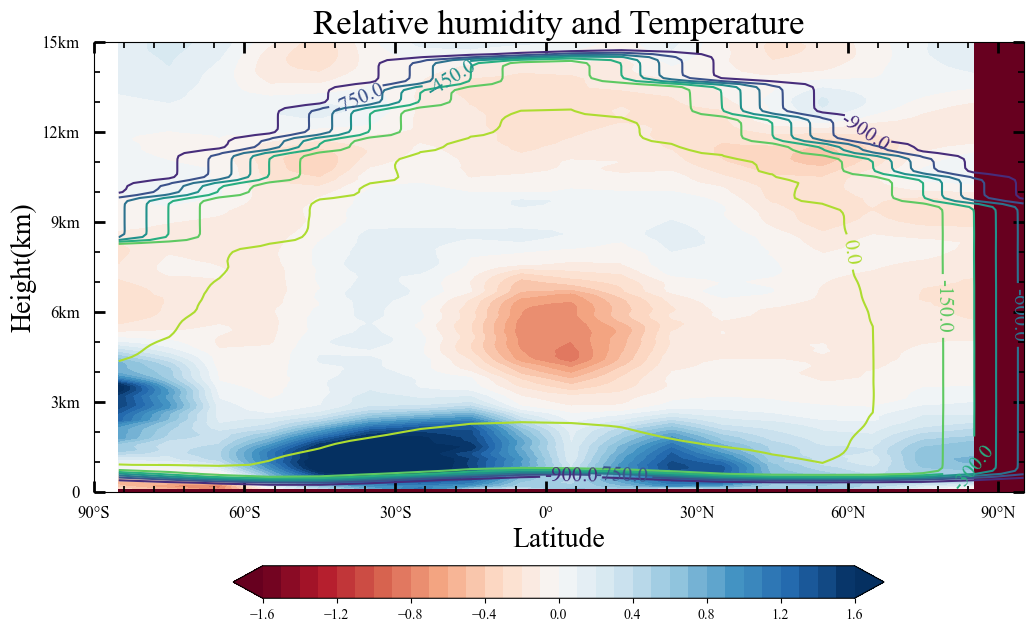

In [125]:
lat, height, rh, t = read_hdf5('/home/Fujian/hwjstu/Students/Chenhongwei/pyhomework/data.hdf5', ['Lat', 'Height', 'RH', 'T'])
plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()
rh_smooth = gaussian_filter(rh[:, :151].T, sigma=1.0)
c1 = ax.contourf(lat, height[:151], t[:, :151].T, cmap='RdBu', extend='both', levels=np.arange(-1.6, 1.61, 0.1))
c2 = ax.contour(lat, height[:151], rh_smooth)
cbar = fig.colorbar(c1, orientation='horizontal', shrink=0.7, pad=0.12)
ax.clabel(c2, c2.levels, inline=True, fontsize=15, fmt='%1.1f')
tick_labels = ['0','3km','6km','9km','12km','15km']
ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])
ax.set_yticks([0, 3, 6, 9, 12, 15], tick_labels)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis="both", which='major', width=2, length=8, direction='in', right=True, top=True, pad=10)
ax.tick_params(axis="both", which='minor', width=1.25, length=4.5, direction='in', right=True, top=True)
ax.tick_params(tick2On=True, label2On=False)
ax.xaxis.set_minor_locator(MultipleLocator(6))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize='large')
ax.set_ylabel('Height(km)', fontsize=20)
ax.set_xlabel('Latitude', fontsize=20)
ax.set_title('Relative humidity and Temperature', fontsize=25)
plt.savefig(f'/home/Fujian/hwjstu/Students/Chenhongwei/pyhomework/chw.png', bbox_inches='tight')